# Decision Trees



## Some beautiful visualisations

Have a look at this elegant demonstration of D3 showing decision
trees at work

http://www.r2d3.us/visual-intro-to-machine-learning-part-1/


## Titanic

In this lab we will explore the passengers on the Titanic again.

In [1]:
# You will want to use the pandas library, and sklearn.tree
import pandas
import sklearn.tree

In [2]:
# Read in the file titanic.csv (which is in the data/ folder)
titanic = pandas.read_csv('../../../SYD_DAT_7/data/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [28]:
# Since we need numeric data, add another numeric column based
# upon the "Sex" column (e.g. male=0, female=1)
import numpy
titanic['Gender'] = numpy.where(titanic.Sex == 'male', 1, 0)
titanic

/Users/Bastien/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0


In [4]:
# Either drop rows where the age isn't known, or fill with
# the mean value
titanic = titanic[numpy.isfinite(titanic['Age'])]
# titanic

In [29]:
# Create a DecisionTreeClassifier which splits based on 
# entropy with a depth of 1
features = ['Gender','Pclass', 'Age']
X = titanic[features]
y = titanic.Survived
dtc = sklearn.tree.DecisionTreeClassifier(max_depth=1, criterion='entropy')
dtc.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [30]:
import pydot

# !pip install pyparsing
# !pip install pydot

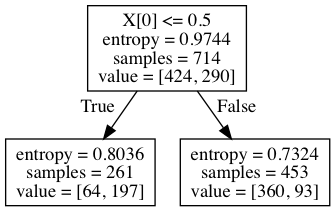

In [31]:
# Try to predicted the 'Survived' column from 'Pclass', 'Age' and gender
try:
 from StringIO import StringIO
except ImportError:
 from io import StringIO
import sklearn.tree
import IPython.display
import pydot
import pydotplus
File_obj = StringIO()
# sklearn.tree.export_graphviz(dtc, out_file=File_obj, feature_names=features)

# print(File_obj.getvalue())

# value = """digraph Tree {node [shape=box] ;
# 0 [label="Gender <= 0.5\ngini = 0.4824\nsamples = 714\nvalue = [424, 290]"] ;
# 1 [label="gini = 0.3702\nsamples = 261\nvalue = [64, 197]"] ;
# 0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
# 2 [label="gini = 0.3263\nsamples = 453\nvalue = [360, 93]"] ;
# 0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
# }'"""

# Graph = pydotplus.graph_from_dot_data(value)
# IPython.display.Image(Graph[0].create_png())

dot_data = StringIO()
sklearn.tree.export_graphviz(dtc, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
IPython.display.Image(graph.create_png())

In [32]:
# Use the feature_importances_ to identify what was the most important
# criteria in survival on the Titanic
dtc.feature_importances_

array([ 1.,  0.,  0.])

In [45]:
# Create a deeper DecisionTreeClassifier (e.g. max_depth=3)
dtc3 = sklearn.tree.DecisionTreeClassifier(max_depth=3)
dtc3.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [46]:
# We would like to display this as a tree. 
# import StringIO and create a StringIO object which we
# can use as a file
dot_data = StringIO()
sklearn.tree.export_graphviz(dtc3, out_file=dot_data)


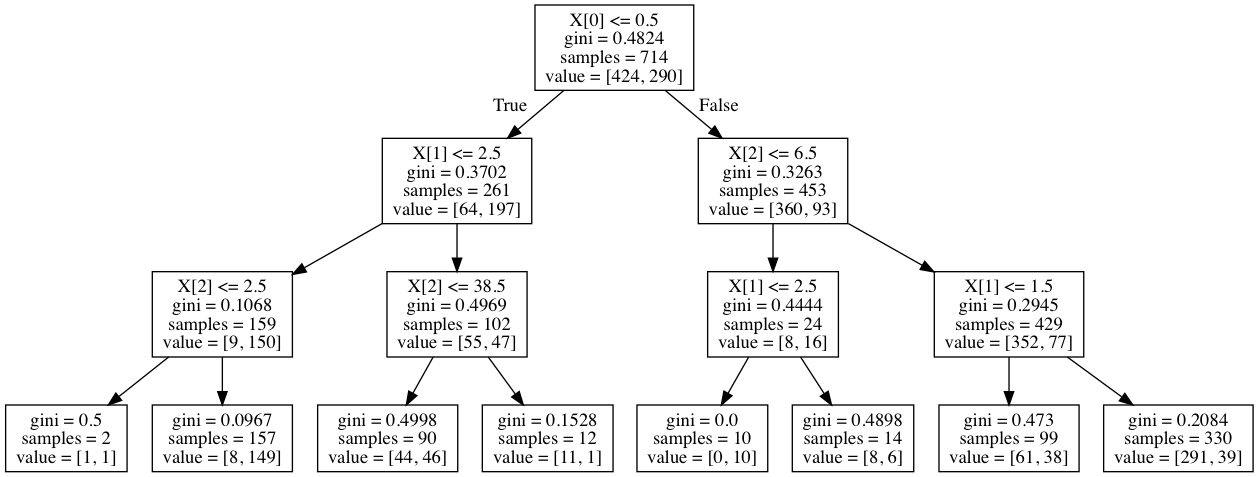

In [35]:
# import the sklearn.tree library and use the export_graphviz
# method to write your deeper decision tree out to the StringIO
# file object
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
IPython.display.Image(graph.create_png())

In [47]:
# confirm that there is some data in your StringIO object
# using the .getvalue() method. You might want to print it
# as it has a lot of newline characters in it
        



290    1
Name: Survived, dtype: int64

In [ ]:
# import the pydot library and use the function graph_from_dot_data
# to create a graph object
# If it all goes very badly, with lots of errors, then try pyplot2 instead
# and look at this:
# http://stackoverflow.com/questions/15951748/pydot-and-graphviz-error-couldnt-import-dot-parser-loading-of-dot-files-will/17902926#17902926


In [ ]:
# import IPython.display and create an Image object from the graph
# object. It should display automatically inline here.

In [48]:
# Trace through this graph manually.
# What would you expect would happen
# to a 26-year old woman in first class?
# Compare that to the predict method's output.

# 'Gender','Pclass', 'Age'
dtc3.predict([[0, 1, 26]])  

array([1])

In [49]:
# Did it get it right? What happened to Miss. Ellen "Nellie" Barber?
titanic.loc[titanic['Name'].str.contains('Nellie')].Survived

290    1
Name: Survived, dtype: int64

In [53]:
titanic.loc[(titanic['Name'].str.contains('Nellie')) & (titanic['Survived'] == True)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.85,NaN,S,0
